In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 80

In [3]:
x = np.array([2, 3, 4, 5, 6, 7, 7, 8, 9, 11, 12])
y = np.array([18, 16, 15, 17, 20, 23, 25, 28, 31, 30, 29])

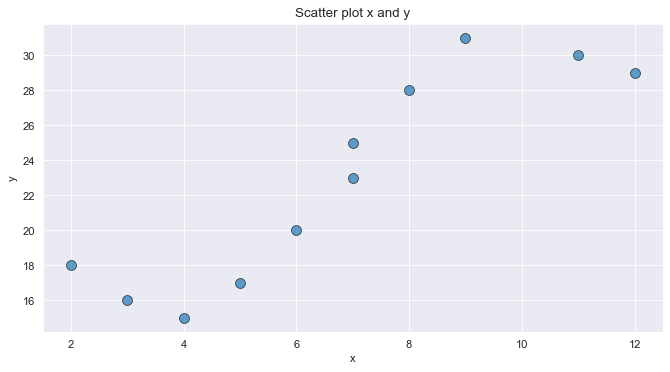

In [7]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    x=x,
    y=y,
    alpha=.7,
    s=80,
    edgecolor='black',
    linewidth=.7
)

plt.title('Scatter plot x and y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# first method

In [20]:
x_poly = np.c_[x, x**2, x**3, x**4]
x_poly

array([[    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   11,   121,  1331, 14641],
       [   12,   144,  1728, 20736]])

In [21]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

LinearRegression()

In [22]:
print(f'Intercept: {poly_reg.intercept_}')
print(f'Coefficients: {poly_reg.coef_}')

Intercept: 38.49442485082088
Coefficients: [-1.58582002e+01  3.32756568e+00 -2.22394920e-01  4.12160979e-03]


In [23]:
y_predict = poly_reg.predict(x_poly)
y_predict

array([18.37507367, 15.19710308, 15.12453238, 17.16920727, 20.44189207,
       24.15226977, 24.15226977, 27.60894196, 30.21942889, 31.02652111,
       28.53276005])

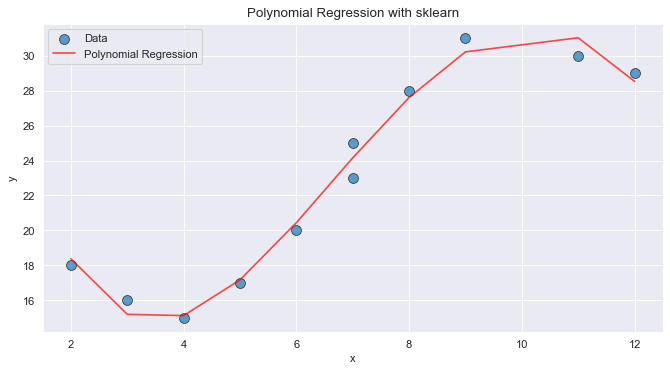

In [24]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    x=x,
    y=y,
    alpha=.7,
    s=80,
    edgecolor='black',
    linewidth=.7,
    label='Data'
)

sns.lineplot(
    x=x,
    y=y_predict,
    color='red',
    alpha=.7,
    label='Polynomial Regression'
)

plt.title('Polynomial Regression with sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [25]:
poly_reg.score(x_poly, y)

0.9858541100090037

# second method

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly = PolynomialFeatures(degree=4, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features , y)

print('Intercept: ', poly_reg_model.intercept_)
print('Coefficients: ', poly_reg_model.coef_)
print('R2: ', poly_reg_model.score(poly_features, y))

Intercept:  38.49442485082088
Coefficients:  [-1.58582002e+01  3.32756568e+00 -2.22394920e-01  4.12160979e-03]
R2:  0.9858541100090037


In [28]:
y_predict = poly_reg_model.predict(poly_features)
y_predict

array([18.37507367, 15.19710308, 15.12453238, 17.16920727, 20.44189207,
       24.15226977, 24.15226977, 27.60894196, 30.21942889, 31.02652111,
       28.53276005])

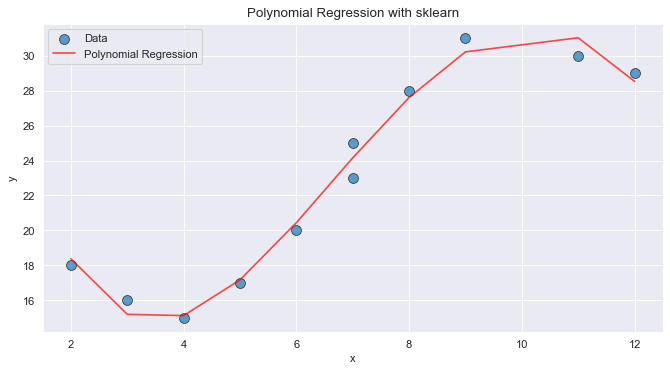

In [29]:
plt.figure(figsize=(10, 5))

sns.scatterplot(
    x=x,
    y=y,
    alpha=.7,
    s=80,
    edgecolor='black',
    linewidth=.7,
    label='Data'
)

sns.lineplot(
    x=x,
    y=y_predict,
    color='red',
    alpha=.7,
    label='Polynomial Regression'
)

plt.title('Polynomial Regression with sklearn')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()